<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/Final_Project_207_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
import os 
from os import listdir
import pandas as pd
import glob as gb
from random import sample
import seaborn as sns
import numpy as np
import shutil
from tensorflow import keras
from tensorflow.keras.utils import load_img
#from keras.preprocessing.image import load_img
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import save_img
import cv2
import random
from os import listdir,makedirs
from os.path import isfile,join
from keras.preprocessing.image import ImageDataGenerator
import joblib
import glob
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Lists down all files in google drive

In [5]:
list(os.listdir('/content/gdrive/MyDrive/train'))

['surprise', 'angry', 'disgust', 'neutral', 'happy', 'fear', 'sad']

Defining variables

In [6]:
FAST_RUN = False
IMAGE_WIDTH=48
IMAGE_HEIGHT=48
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # 3 for Colored Images and 1 for Grayscale Images
BATCH_SIZE=32
EPOCHS= 20

if FAST_RUN:
    EPOCHS= 5 

#80% images are contained in train folder and 20% in validation folder

Loading images into train and validation floders, these are original input folders

In [4]:
train_dir = '/content/gdrive/MyDrive/train/'
val_dir = '/content/gdrive/MyDrive/validation/'

happy_path_train= '/content/gdrive/MyDrive/train/happy'
sad_path_train= '/content/gdrive/MyDrive/train/sad'
angry_path_train= '/content/gdrive/MyDrive/train/angry'
disgust_path_train= '/content/gdrive/MyDrive/train/disgust'
surprise_path_train= '/content/gdrive/MyDrive/train/surprise'
neutral_path_train= '/content/gdrive/MyDrive/train/neutral'
fear_path_train= '/content/gdrive/MyDrive/train/fear'

happy_path_val= '/content/gdrive/MyDrive/validation/happy'
sad_path_val= '/content/gdrive/MyDrive/validation/sad'
angry_path_val= '/content/gdrive/MyDrive/validation/angry'
disgust_path_val= '/content/gdrive/MyDrive/validation/disgust'
surprise_path_val= '/content/gdrive/MyDrive/validation/surprise'
neutral_path_val= '/content/gdrive/MyDrive/validation/neutral'
fear_path_val= '/content/gdrive/MyDrive/validation/fear'

In [5]:
all_paths_together = []
all_paths_together.append(happy_path_train)
all_paths_together.append(sad_path_train)
all_paths_together.append(angry_path_train)
all_paths_together.append(disgust_path_train)
all_paths_together.append(surprise_path_train)
all_paths_together.append(neutral_path_train)
all_paths_together.append(fear_path_train)
all_paths_together.append(happy_path_val)
all_paths_together.append(sad_path_val)
all_paths_together.append(angry_path_val)
all_paths_together.append(disgust_path_val)
all_paths_together.append(surprise_path_val)
all_paths_together.append(neutral_path_val)
all_paths_together.append(fear_path_val)
all_paths_together

['/content/gdrive/MyDrive/train/happy',
 '/content/gdrive/MyDrive/train/sad',
 '/content/gdrive/MyDrive/train/angry',
 '/content/gdrive/MyDrive/train/disgust',
 '/content/gdrive/MyDrive/train/surprise',
 '/content/gdrive/MyDrive/train/neutral',
 '/content/gdrive/MyDrive/train/fear',
 '/content/gdrive/MyDrive/validation/happy',
 '/content/gdrive/MyDrive/validation/sad',
 '/content/gdrive/MyDrive/validation/angry',
 '/content/gdrive/MyDrive/validation/disgust',
 '/content/gdrive/MyDrive/validation/surprise',
 '/content/gdrive/MyDrive/validation/neutral',
 '/content/gdrive/MyDrive/validation/fear']

In [6]:
all_image_qualified_list = []
postive_emotion_image_qualified_list = []
negative_emotion_image_qualified_list = []
for path_val in all_paths_together:
    for img in os.listdir(path_val):
        all_image_qualified_list.append(path_val + '/' + img)
        if 'happy' in path_val or 'neutral' in path_val:
             postive_emotion_image_qualified_list.append(path_val + '/' + img)
        else:
            negative_emotion_image_qualified_list.append(path_val + '/' + img)
print(len(all_image_qualified_list), len(postive_emotion_image_qualified_list), len(negative_emotion_image_qualified_list)) # 35887

35887 15187 20700


As we see that negative emotion images are more than the positive emotions, we will be downsampling the populated class, thus we will have 15187 positive and 15187 negative images.

In [8]:
random.shuffle(postive_emotion_image_qualified_list)

In [19]:
'/content/gdrive/MyDrive/train/happy/29509.jpg'.split(".")[0] + '_gs.' + '/content/gdrive/MyDrive/train/happy/29509.jpg'.split(".")[1]

'/content/gdrive/MyDrive/train/happy/29509_gs.jpg'

In [9]:
# Shuffle the data
random.shuffle(negative_emotion_image_qualified_list)
negative_emotion_image_qualified_list = negative_emotion_image_qualified_list[:len(postive_emotion_image_qualified_list)]

We will split the data in 7:2:1 ration in train, validation and test category respectively. 

In [10]:
train_split = int(len(postive_emotion_image_qualified_list) * .7)
val_split = int(len(postive_emotion_image_qualified_list) * .9)
len(postive_emotion_image_qualified_list[:train_split]), len(postive_emotion_image_qualified_list[train_split : val_split]), len(postive_emotion_image_qualified_list[val_split:])

(10630, 3038, 1519)

We are repurposing inoput 7 categories to binary format of positive and negative emotions. Thts' why we are creating new folder structure to represent that.

# Defining destination directories with postive and negative emotions for train, validation and test each. We are putting all the processed **grayscale** images under root directory /content/gdrive/MyDrive/image_processing.


                                                                                       

In [ ]:
pos_train= '/content/gdrive/MyDrive/training_emotions/1'
neg_train= '/content/gdrive/MyDrive/training_emotions/0'

pos_val= '/content/gdrive/MyDrive/validation_emotions/1'
neg_val= '/content/gdrive/MyDrive/validation_emotions/0'

pos_test = '/content/gdrive/MyDrive/test_emotions/1'
neg_test = '/content/gdrive/MyDrive/test_emotions/0'

In [ ]:
'''
/content/gdrive/MyDrive/image_processing ---| train_emotions | 0
                                                             | 1
                                         ---| val_emotions   | 0
                                                             | 1
                                         ---| test_emotions  | 0
                                                             | 1
'''                                                             

positive emotions are comprised of happy and neutral, negative emotions are the rest emotions in the input set.

In [11]:
root_directory = '/content/gdrive/MyDrive/image_processing'
image_processing_training_emotions_path = '/content/gdrive/MyDrive/image_processing/training_gs_emotions'
image_processing_val_emotions_path = '/content/gdrive/MyDrive/image_processing/val_gs_emotions'
image_processing_test_emotions_path = '/content/gdrive/MyDrive/image_processing/test_gs_emotions'

In [12]:
def create_dir(dir_path):
    os.mkdir(dir_path, mode = 0o777, exist_ok = False)

In [13]:
def create_nested_structure(root_dir):
    for grp in ['training_gs_emotions', 'val_gs_emotions', 'test_gs_emotions']:
        for sub_grp in ['0', '1']:
            path_val = root_dir + '/' + grp + '/' + sub_grp
            create_dir(path_val)

In [15]:
def empty_dir(dir_path):
    shutil.rmtree(dir_path)

In [16]:
def copy_files(file_list, dest_path):
    for file in file_list:
        shutil.copy(file, dest_path)

In [23]:
postive_emotion_train_image_list = postive_emotion_image_qualified_list[:train_split]
postive_emotion_val_image_list = postive_emotion_image_qualified_list[train_split : val_split]
postive_emotion_test_image_list = postive_emotion_image_qualified_list[val_split:]

negative_emotion_train_image_list = negative_emotion_image_qualified_list[:train_split]
negative_emotion_val_image_list = negative_emotion_image_qualified_list[train_split : val_split]
negative_emotion_test_image_list = negative_emotion_image_qualified_list[val_split:]

In [26]:
len([postive_emotion_train_image_list, postive_emotion_val_image_list, postive_emotion_test_image_list, negative_emotion_train_image_list, negative_emotion_val_image_list, negative_emotion_test_image_list])

6

In [28]:
postive_emotion_train_image_list[:5]

['/content/gdrive/MyDrive/train/happy/19219.jpg',
 '/content/gdrive/MyDrive/validation/happy/7026.jpg',
 '/content/gdrive/MyDrive/train/neutral/8023.jpg',
 '/content/gdrive/MyDrive/train/neutral/19232.jpg',
 '/content/gdrive/MyDrive/train/happy/7178.jpg']

In [33]:
test_img = load_img(postive_emotion_train_image_list[0], color_mode ="grayscale")
test_img1 = load_img(postive_emotion_train_image_list[0])

test_img_arry = img_to_array(test_img)
test_img_arry1 = img_to_array(test_img1)

print(type(test_img))
print(test_img.format)
print(test_img.mode)
print(test_img.size)
print(test_img.getbands())
print(test_img_arry.shape)

print(type(test_img1))
print(test_img1.format)
print(test_img1.mode)
print(test_img1.size)
print(test_img1.getbands())
print(test_img_arry1.shape)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
L
(48, 48)
('L',)
(48, 48, 1)
<class 'PIL.Image.Image'>
None
RGB
(48, 48)
('R', 'G', 'B')
(48, 48, 3)


In [44]:
def create_gs_file(file_list):
    for file in file_list:
        #print(file)
        gs_img = load_img(file, color_mode = 'grayscale')
        gs_img_array = img_to_array(gs_img)
        gs_file_name = file.split(".")[0] + "_gs." + file.split(".")[1]
        #array_to_img(gs_file_name)
        save_img(gs_file_name, gs_img_array)

In [ ]:
for file_list in [postive_emotion_train_image_list, postive_emotion_val_image_list, postive_emotion_test_image_list, negative_emotion_train_image_list, negative_emotion_val_image_list, negative_emotion_test_image_list]:
    create_gs_file(file_list)

In [ ]:
create_nested_structure(root_directory)

In [ ]:
def move_gs_files(src_path, pattern = "_gs.jpg"):
    gs_image_list = [src_path "/" file file for file os.listdir(src_path) if pattern in file]
    for gs_image in gs_image_list:
        if 'happy' in gs_image or 'neutral' in gs_image:
            if 'train' in gs_image:
                tgt_path = image_processing_training_emotions_path + "/1" 
            elif 'val' in gs_image:
                tgt_path = image_processing_val_emotions_path + "/1" 
            elif 'test' in gs_image:
                tgt_path = image_processing_test_emotions_path + "/1" 
        else:
            if 'train' in gs_image:
                tgt_path = image_processing_training_emotions_path + "/0" 
            elif 'val' in gs_image:
                tgt_path = image_processing_val_emotions_path + "/0" 
            elif 'test' in gs_image:
                tgt_path = image_processing_test_emotions_path + "/0" 
        shutil.copy(gs_image, tgt_path)

In [ ]:
for file_list in [postive_emotion_train_image_list, postive_emotion_val_image_list, postive_emotion_test_image_list, negative_emotion_train_image_list, negative_emotion_val_image_list, negative_emotion_test_image_list]:
    move_gs_files(file_list)

In [ ]:
train_img_list =  [load_img(img,color_mode='grayscale') for img in train_emotions['image'].values.tolist()]
train_img_np_arry = [img_to_array(img) for img in train_img_list]
print(f"images shape {train_img_np_arry[0].shape}")

In [ ]:
'''
train_grayscale= '/content/gdrive/MyDrive/train_grayscale'
training_emotions= '/content/gdrive/MyDrive/training_emotions'
val_grayscale='/content/gdrive/MyDrive/validation_grayscale'
validation_emotions= '/content/gdrive/MyDrive/validation_emotions'
'''

In [ ]:
#shutil.rmtree(validation_emotions)

# Loading images from source Directories to destination directors

In [ ]:
# create dest directories
train_happy_path= '/content/gdrive/MyDrive/train_grayscale/happy'
train_sad_path= '/content/gdrive/MyDrive/train_grayscale/sad'
train_angry_path= '/content/gdrive/MyDrive/train_grayscale/angry'
train_disgust_path= '/content/gdrive/MyDrive/train_grayscale/disgust'
train_surprise_path= '/content/gdrive/MyDrive/train_grayscale/surprise'
train_neutral_path= '/content/gdrive/MyDrive/train_grayscale/neutral'
train_fear_path= '/content/gdrive/MyDrive/train_grayscale/fear'


val_happy_path= '/content/gdrive/MyDrive/validation_grayscale/happy'
val_sad_path= '/content/gdrive/MyDrive/validation_grayscale/sad'
val_angry_path= '/content/gdrive/MyDrive/validation_grayscale/angry'
val_disgust_path= '/content/gdrive/MyDrive/validation_grayscale/disgust'
val_surprise_path= '/content/gdrive/MyDrive/validation_grayscale/surprise'
val_neutral_path= '/content/gdrive/MyDrive/validation_grayscale/neutral'
val_fear_path= '/content/gdrive/MyDrive/validation_grayscale/fear'

train_path=[train_happy_path,train_sad_path,train_angry_path#,train_disgust_path
            ,train_surprise_path
            ,train_neutral_path,
            train_fear_path,val_happy_path,val_sad_path,val_angry_path#,val_disgust_path
            ,val_surprise_path,val_neutral_path,val_fear_path]

def load_category(path):
  for category in path:
    os.mkdir(category)

load_category(train_path)


# Function used to convert images to grayscale

In [ ]:
def convert_image_to_greyscale(path,dstpath ):
  try:
    makedirs(dstpath)
  except:
    print ("The directory already exists, the images will be written in the same folder")

  files = [f for f in listdir(path)]
  for image in files:
    try:
        img = cv2.imread(os.path.join(path,image))
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        dstPath = join(dstpath,image  )
        cv2.imwrite(dstPath,gray)
    except:
        print ("{} is not converted".format(image))
    for fil in glob.glob("*.png"):
      try:
        image = cv2.imread(fil)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(dstpath,fil),gray_image  )
      except:
        print('{} is not converted')

# Convert train images to grayscale

In [ ]:
convert_image_to_greyscale(happy_path_train,train_happy_path)
convert_image_to_greyscale(sad_path_train,train_sad_path)
convert_image_to_greyscale(angry_path_train,train_angry_path)
convert_image_to_greyscale(fear_path_train,train_fear_path)
convert_image_to_greyscale(disgust_path_train,train_disgust_path)
convert_image_to_greyscale(neutral_path_train,train_neutral_path)
convert_image_to_greyscale(surprise_path_train,train_surprise_path)


In [ ]:
convert_image_to_greyscale(happy_path_train,pos_train)
convert_image_to_greyscale(sad_path_train,neg_train)
convert_image_to_greyscale(angry_path_train,neg_train)
convert_image_to_greyscale(fear_path_train,neg_train)
convert_image_to_greyscale(disgust_path_train,neg_train)
convert_image_to_greyscale(neutral_path_train,pos_train)
convert_image_to_greyscale(surprise_path_train,neg_train)

The directory already exists, the images will be written in the same folder
The directory already exists, the images will be written in the same folder
The directory already exists, the images will be written in the same folder
The directory already exists, the images will be written in the same folder
The directory already exists, the images will be written in the same folder


In [ ]:
def load_images(dir):
  image_paths=[]
  labels=[]
  for label in os.listdir(dir):
    for file_name in os.listdir(dir+ '/'+label) :
      image_path= os.path.join(dir,label, file_name)
    
      image_paths.append(image_path)
      #image_paths.append( os.path.split(image_path)[-1])
      labels.append(label)
  return image_paths,labels

#EDA : Train Data

In [ ]:
train=pd.DataFrame()
train['image'],train['label']=load_images(train_grayscale)
print ('the size of train data is : ', len(train))
train.head()

the size of train data is :  28821


,image,label
0,/content/gdrive/MyDrive/train_grayscale/happy/...,happy
1,/content/gdrive/MyDrive/train_grayscale/happy/...,happy
2,/content/gdrive/MyDrive/train_grayscale/happy/...,happy
3,/content/gdrive/MyDrive/train_grayscale/happy/...,happy
4,/content/gdrive/MyDrive/train_grayscale/happy/...,happy


# Plotting train images as is

In [ ]:
train['label'].value_counts()

happy       7164
neutral     4982
sad         4938
fear        4103
angry       3993
surprise    3205
disgust      436
Name: label, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


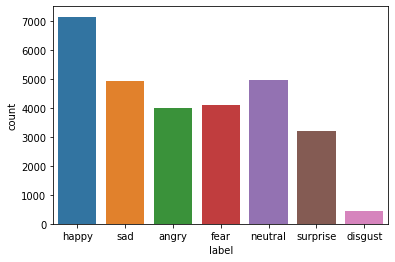

In [ ]:
sns.countplot(train['label'])

In [ ]:
import plotly.express as px
fig = px.pie(train, 
             values = train['label'].value_counts().values, 
             names = train['label'].unique())
fig.show()

# Handle Imbalance 

We decided to group all the 7 classes into two classes whereas positive emotions are both happy and neutral represented by label 1 and negative emotions class includes: disgust, angry, sad, fear, surprise represented by label 0 

In [ ]:
train_emotions=pd.DataFrame()
train_emotions['image'],train_emotions['label']=load_images(training_emotions)
print ('the size of train data is : ', len(train_emotions))
train_emotions.head()

the size of train data is :  28821


,image,label
0,/content/gdrive/MyDrive/training_emotions/1/87...,1
1,/content/gdrive/MyDrive/training_emotions/1/33...,1
2,/content/gdrive/MyDrive/training_emotions/1/74...,1
3,/content/gdrive/MyDrive/training_emotions/1/20...,1
4,/content/gdrive/MyDrive/training_emotions/1/34...,1


In [ ]:
train_emotions['label'].value_counts()

0    16675
1    12146
Name: label, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



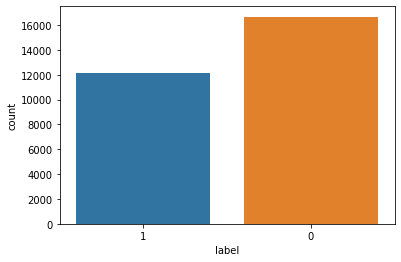

In [ ]:
sns.countplot(train_emotions['label'])

In [ ]:
import plotly.express as px
fig = px.pie(train_emotions, 
             values = train_emotions['label'].value_counts().values, 
             names = train_emotions['label'].unique())
fig.show()

#Check if images are actually converted to grayscale

In [ ]:
test_img = load_img(train_emotions['image'].iloc[0], color_mode ="grayscale")
test_img_arry = img_to_array(test_img)
print(type(test_img))
print(test_img.format)
print(test_img.mode)
print(test_img.size)
print(test_img.getbands())
print(test_img_arry.shape)
test_img1 = load_img(train_emotions['image'].iloc[0])
test_img1_arry = img_to_array(test_img1)
print(test_img1_arry.shape)
print(test_img1.getbands())


<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
L
(48, 48)
('L',)
(48, 48, 1)
(48, 48, 3)
('R', 'G', 'B')


##Display the first 5 images of train data

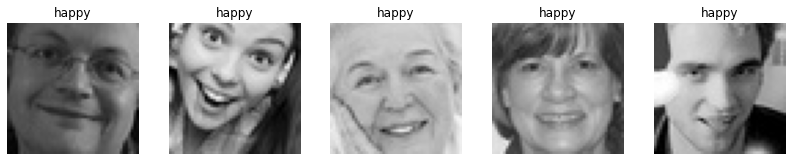

In [ ]:
plt.figure(figsize=(14, 14))
files= train.iloc[0:5]#train.iloc[0:5]
for i ,file, label in files.itertuples():
  plt.subplot(5,5,i+1)
  img= load_img(file)
  img= np.array(img)
  plt.imshow(img)
  plt.title(label)
  plt.axis('off')

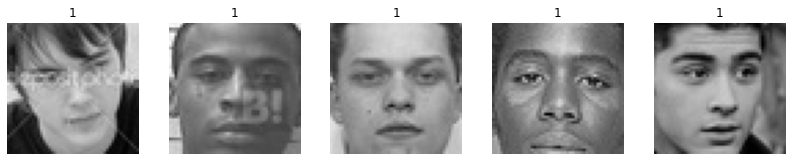

In [ ]:
plt.figure(figsize=(14, 14))
files= train_emotions.iloc[0:5]#train.iloc[0:5]
for i ,file, label in files.itertuples():
  plt.subplot(5,5,i+1)
  img= load_img(file)
  img= np.array(img)
  plt.imshow(img)
  plt.title(label)
  plt.axis('off')

# Convert validation images to grayscale 

In [ ]:
convert_image_to_greyscale(happy_path_val,val_happy_path)
convert_image_to_greyscale(sad_path_val,val_sad_path)
convert_image_to_greyscale(angry_path_val,val_angry_path)
convert_image_to_greyscale(fear_path_val,val_fear_path)
convert_image_to_greyscale(disgust_path_val,val_disgust_path)
convert_image_to_greyscale(neutral_path_val,val_neutral_path)
convert_image_to_greyscale(surprise_path_val,val_surprise_path)

The directory already exists, the images will be written in the same folder
The directory already exists, the images will be written in the same folder
The directory already exists, the images will be written in the same folder
The directory already exists, the images will be written in the same folder
The directory already exists, the images will be written in the same folder
The directory already exists, the images will be written in the same folder


In [ ]:
convert_image_to_greyscale(happy_path_val,pos_val)
convert_image_to_greyscale(sad_path_val,neg_val)
convert_image_to_greyscale(angry_path_val,neg_val)
convert_image_to_greyscale(fear_path_val,neg_val)
convert_image_to_greyscale(disgust_path_val,neg_val)
convert_image_to_greyscale(neutral_path_val,pos_val)
convert_image_to_greyscale(surprise_path_val,neg_val)

The directory already exists, the images will be written in the same folder
The directory already exists, the images will be written in the same folder
The directory already exists, the images will be written in the same folder
The directory already exists, the images will be written in the same folder
The directory already exists, the images will be written in the same folder


#EDA: Validation Data

In [ ]:
val=pd.DataFrame()
val['image'],val['label']=load_images(val_grayscale)
print ('the size of train data is : ', len(val))
val.head()

the size of train data is :  7066


,image,label
0,/content/gdrive/MyDrive/validation_grayscale/h...,happy
1,/content/gdrive/MyDrive/validation_grayscale/h...,happy
2,/content/gdrive/MyDrive/validation_grayscale/h...,happy
3,/content/gdrive/MyDrive/validation_grayscale/h...,happy
4,/content/gdrive/MyDrive/validation_grayscale/h...,happy


In [ ]:
val['label'].value_counts()

happy       1825
neutral     1216
sad         1139
fear        1018
angry        960
surprise     797
disgust      111
Name: label, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



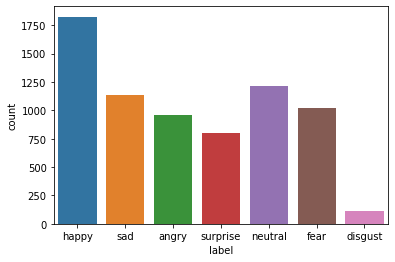

In [ ]:
sns.countplot(val['label'])

# Display the first 5 images of validation data

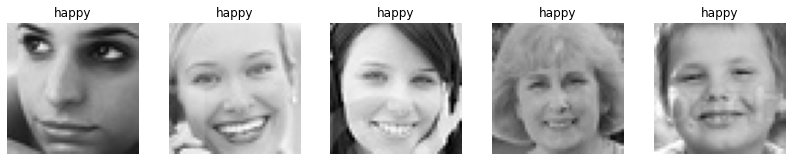

In [ ]:
plt.figure(figsize=(14, 14))
files=val.iloc[0:5]
for i ,file, label in files.itertuples():
  plt.subplot(5,5,i+1)
  img= load_img(file)
  img= np.array(img)
  plt.imshow(img)
  plt.title(label)
  plt.axis('off')

# Handle Imbalance 

We decided to group all the 7 classes into two classes where positive emotions are both happy and neutral represented by label 1 and negative emotions class includes: disgust, angry, sad, fear, surprise represented by label 0 

In [ ]:
val_emotions=pd.DataFrame()
val_emotions['image'],val_emotions['label']=load_images(validation_emotions)
print ('the size of train data is : ', len(val_emotions))
val_emotions.head()

the size of train data is :  7066


,image,label
0,/content/gdrive/MyDrive/validation_emotions/1/...,1
1,/content/gdrive/MyDrive/validation_emotions/1/...,1
2,/content/gdrive/MyDrive/validation_emotions/1/...,1
3,/content/gdrive/MyDrive/validation_emotions/1/...,1
4,/content/gdrive/MyDrive/validation_emotions/1/...,1


In [ ]:
val_emotions['label'].value_counts()

0    4025
1    3041
Name: label, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



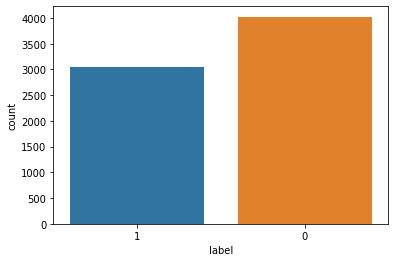

In [ ]:
sns.countplot(val_emotions['label'])

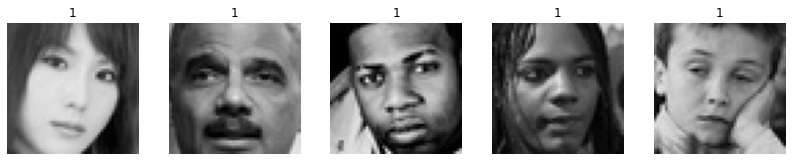

In [ ]:
plt.figure(figsize=(14, 14))
files=val_emotions.iloc[0:5]
for i ,file, label in files.itertuples():
  plt.subplot(5,5,i+1)
  img= load_img(file)
  img= np.array(img)
  plt.imshow(img)
  plt.title(label)
  plt.axis('off')

In [ ]:
def load_images(dir):
  #image_paths=[]
  images=[]
  labels=[]
  #data=[]
  for label in os.listdir(dir):
      for file_name in os.listdir(dir+ '/'+label) :
        image_path= os.path.join(dir,label, file_name)
        #image_paths.append(image_path)
        img = cv2.imread(image_path)
        new_img = cv2.resize(img, (48, 48))
        #data.append([new_img,label])
        images.append(new_img)
        #print(img)
        #image_paths.append( os.path.split(image_path)[-1])
        labels.append(label)
        
      else:
        continue
  return images,labels

In [ ]:
train_img_list =  [load_img(img,color_mode='grayscale') for img in train_emotions['image'].values.tolist()]
train_img_np_arry = [img_to_array(img) for img in train_img_list]
print(f"images shape {train_img_np_arry[0].shape}")


In [ ]:
# Pixel values range from 0 to 255. To normalize the data, 
# we just need to divide all values by 255.
X_train = train_img_np_arry / 255
#X_test = X_test / 255

In [ ]:
train_label_list =  np.asarray(train_emotions['label'].values.tolist())
#print(f"images shape {train_label_list[0].shape}")


In [ ]:
images=np.array(load_images(train_emotions)['image'])
labels= np.array(load_images(train_emotions)['label'])
print(f"images shape {images.shape}")
print(f"labels shape {labels.shape}")

TypeError: ignored

In [ ]:
image_size = (48, 48)
# image resize
X_train = tf.image.resize(X_train, size=image_size)
X_test = tf.image.resize(X_test, size=image_size)


ValueError: ignored

In [ ]:
Y_train = Y_train.flatten()
Y_test = Y_test.flatten()

AttributeError: ignored

In [ ]:
print("X_train.shape:", X_train.shape)
print("Y_train.shape:", Y_train.shape)
print("X_test.shape:", X_test.shape)
print("Y_test.shape:", Y_test.shape)

In [ ]:
def build_model(learning_rate=0.01):
  """Build a TF logistic regression model using Keras.

  Args:
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """
  # This is not strictly necessary, but each time you build a model, TF adds
  # new nodes (rather than overwriting), so the colab session can end up
  # storing lots of copies of the graph when you only care about the most
  # recent. Also, as there is some randomness built into training with SGD,
  # setting a random seed ensures that results are the same on each identical
  # training run.
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  # Build a model using keras.Sequential.
  model = keras.Sequential()

  # Keras layers can do pre-processing. This layer will take our 28x28 images
  # and flatten them into vectors of size 784.
  model.add(keras.layers.Flatten())
  
  # This layer constructs the linear set of parameters for each input feature
  # (as well as a bias), and applies a sigmoid to the result. The result is
  # binary logistic regression.
  model.add(keras.layers.Dense(
      units=1,                     # output dim (for binary classification)
      use_bias=True,               # use a bias param
      activation="sigmoid"         # apply the sigmoid function!
  ))

  # Use the SGD optimizer as usual.
  optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

  # We specify the binary_crossentropy loss (equivalent to log loss).
  # Notice that we are including 'binary accuracy' as one of the metrics that we
  # ask Tensorflow to report when evaluating the model.
  model.compile(loss='binary_crossentropy', 
                optimizer=optimizer, 
                metrics=[metrics.binary_accuracy])

  return model

In [ ]:
model = build_model(learning_rate=0.01)

# Fit the model.
history = model.fit(
  x = X_train_binary,   # our binary training examples
  y = Y_train_binary,   # corresponding binary labels
  epochs=5,             # number of passes through the training data
  batch_size=64,        # mini-batch size for SGD
  validation_split=0.1, # use a fraction of the examples for validation
  verbose=1             # display some progress output during training
  )

# Convert the return value into a DataFrame so we can see the train loss 
# and binary accuracy after every epoch.
history = pd.DataFrame(history.history)
display(history)

# Feeding data from a directory using ImageDataGenerator.

We perform data augmentation randomly rotating and zooming the image. We are aiming to get more data for categaries with small size data. 

The function flow_from_directory specifies how the generator should import the images by specifying path, img size, colors, etc...



In [ ]:
"""
Data Augmentation
--------------------------
rotation_range = rotates the image with the amount of degrees we provide
width_shift_range = shifts the image randomly to the right or left along the width of the image
height_shift range = shifts image randomly to up or below along the height of the image
horizontal_flip = flips the image horizontally
rescale = to scale down the pizel values in our image between 0 and 1
zoom_range = applies random zoom to our object
validation_split = reserves some images to be used for validation purpose
"""

# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator(rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         zoom_range = 0.3)
datagen_validation = ImageDataGenerator(rescale = 1./255)

In [ ]:
"""
Applying data augmentation to the images as we read 
them from their respectivve directories
"""
img_size=48
train_generator = datagen_train.flow_from_directory(directory = training_emotions,
                                                    target_size = (img_size,img_size),
                                                    color_mode = "grayscale",
                                                    batch_size=batch_size,
                                                    class_mode = "binary",
                                                     shuffle=True
                                                   )
validation_generator = datagen_validation.flow_from_directory( directory = validation_emotions,
                                                              target_size = (img_size,img_size),
                                                              color_mode = "grayscale",
                                                              batch_size=batch_size,
                                                              class_mode = "binary",
                                                              shuffle=False
                                                             )

Found 28821 images belonging to 2 classes.
Found 7066 images belonging to 2 classes.


In [ ]:
#building model with 1 class
from tensorflow.keras.optimizers import Adam,SGD,RMSprop




model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.3))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.3))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))



#opt = Adam(lr = 0.001)
model.compile(optimizer = tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),  
              metrics = ['accuracy'])
#model.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [ ]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              #patience=2, min_lr=0.00001, mode='auto')
#checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             #save_weights_only=True, mode='max', verbose=1)
#callbacks = [PlotLossesCallback(), checkpoint, reduce_lr]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
)

Epoch 1/15
 25/225 [==>...........................] - ETA: 1:42:42 - loss: 0.8371 - accuracy: 0.5496

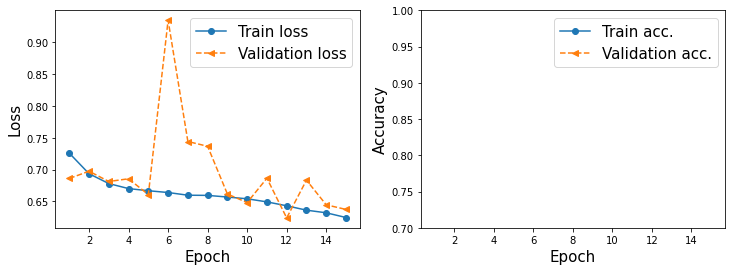

In [ ]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
ax.set_ylim(0.7,1)
plt.show()

In [ ]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#Stopping training when a monitored metric has stopped improving.
early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 50

model.compile(loss='binary_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
# number of epochs to train the NN
tf.random.set_seed(123)
np.random.seed(123)
#epochs = 10

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='validation_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

<ipython-input-44-8be9d63677ee>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/50
225/225 [==============================] - ETA: 0s - loss: 0.7269 - accuracy: 0.5475 

225/225 [==============================] - 12356s 55s/step - loss: 0.7269 - accuracy: 0.5475 - val_loss: 0.7271 - val_accuracy: 0.4283
Epoch 2/50
225/225 [==============================] - ETA: 0s - loss: 0.6915 - accuracy: 0.5671

225/225 [==============================] - 63s 280ms/step - loss: 0.6915 - accuracy: 0.5671 - val_loss: 0.7508 - val_accuracy: 0.4355
Epoch 3/50
225/225 [==============================] - ETA: 0s - loss: 0.6776 - accuracy: 0.5857

225/225 [==============================] - 62s 275ms/step - loss: 0.6776 - accuracy: 0.5857 - val_loss: 0.6864 - val_accuracy: 0.5554
Epoch 4/50
225/225 [==============================] - ETA: 0s - loss: 0.6730 - accuracy: 0.5959

225/225 [==============================] - 60s 268ms/step - loss: 0.6730 - accuracy: 0.5959 - val_loss: 0.6745 - val_accuracy: 0.5899
Epoch 5/50
225/225 [==============================] - ETA: 0s - loss: 0.6669 - accuracy: 0.6028

225/225 [==============================] - 60s 268ms/step - loss: 0.6669 - accuracy: 0.6028 - val_loss: 0.6852 - val_accuracy: 0.5693
Epoch 6/50
225/225 [==============================] - ETA: 0s - loss: 0.6636 - accuracy: 0.6106

225/225 [==============================] - 62s 275ms/step - loss: 0.6636 - accuracy: 0.6106 - val_loss: 0.6768 - val_accuracy: 0.5876
Epoch 7/50
225/225 [==============================] - ETA: 0s - loss: 0.6590 - accuracy: 0.6124

225/225 [==============================] - 61s 269ms/step - loss: 0.6590 - accuracy: 0.6124 - val_loss: 0.6824 - val_accuracy: 0.5791
Epoch 8/50
225/225 [==============================] - ETA: 0s - loss: 0.6550 - accuracy: 0.6174

225/225 [==============================] - 59s 262ms/step - loss: 0.6550 - accuracy: 0.6174 - val_loss: 0.6860 - val_accuracy: 0.5862
Epoch 9/50
225/225 [==============================] - ETA: 0s - loss: 0.6548 - accuracy: 0.6195

225/225 [==============================] - 59s 261ms/step - loss: 0.6548 - accuracy: 0.6195 - val_loss: 0.6797 - val_accuracy: 0.6219
Epoch 10/50
225/225 [==============================] - ETA: 0s - loss: 0.6474 - accuracy: 0.6297

225/225 [==============================] - 61s 270ms/step - loss: 0.6474 - accuracy: 0.6297 - val_loss: 0.7743 - val_accuracy: 0.5994
Epoch 11/50
225/225 [==============================] - ETA: 0s - loss: 0.6447 - accuracy: 0.6309

225/225 [==============================] - 59s 261ms/step - loss: 0.6447 - accuracy: 0.6309 - val_loss: 0.7199 - val_accuracy: 0.5500
Epoch 12/50
225/225 [==============================] - ETA: 0s - loss: 0.6343 - accuracy: 0.6432

225/225 [==============================] - 59s 263ms/step - loss: 0.6343 - accuracy: 0.6432 - val_loss: 0.7889 - val_accuracy: 0.5222
Epoch 13/50
225/225 [==============================] - ETA: 0s - loss: 0.6299 - accuracy: 0.6529

225/225 [==============================] - 60s 265ms/step - loss: 0.6299 - accuracy: 0.6529 - val_loss: 0.6308 - val_accuracy: 0.6518
Epoch 14/50
225/225 [==============================] - ETA: 0s - loss: 0.6212 - accuracy: 0.6600

225/225 [==============================] - 58s 259ms/step - loss: 0.6212 - accuracy: 0.6600 - val_loss: 0.6093 - val_accuracy: 0.6696
Epoch 15/50
225/225 [==============================] - ETA: 0s - loss: 0.6174 - accuracy: 0.6650

225/225 [==============================] - 58s 258ms/step - loss: 0.6174 - accuracy: 0.6650 - val_loss: 0.6310 - val_accuracy: 0.6438
Epoch 16/50
225/225 [==============================] - ETA: 0s - loss: 0.6049 - accuracy: 0.6740

225/225 [==============================] - 59s 261ms/step - loss: 0.6049 - accuracy: 0.6740 - val_loss: 0.6142 - val_accuracy: 0.6612
Epoch 17/50
225/225 [==============================] - ETA: 0s - loss: 0.6013 - accuracy: 0.6803

225/225 [==============================] - 59s 261ms/step - loss: 0.6013 - accuracy: 0.6803 - val_loss: 0.6014 - val_accuracy: 0.6854
Epoch 18/50
225/225 [==============================] - ETA: 0s - loss: 0.5953 - accuracy: 0.6814

225/225 [==============================] - 58s 258ms/step - loss: 0.5953 - accuracy: 0.6814 - val_loss: 0.6413 - val_accuracy: 0.6564
Epoch 19/50
225/225 [==============================] - ETA: 0s - loss: 0.5882 - accuracy: 0.6894

225/225 [==============================] - 60s 264ms/step - loss: 0.5882 - accuracy: 0.6894 - val_loss: 0.7108 - val_accuracy: 0.5582
Epoch 20/50
225/225 [==============================] - ETA: 0s - loss: 0.5818 - accuracy: 0.6968

225/225 [==============================] - 58s 258ms/step - loss: 0.5818 - accuracy: 0.6968 - val_loss: 0.5960 - val_accuracy: 0.6859
Epoch 21/50
225/225 [==============================] - ETA: 0s - loss: 0.5729 - accuracy: 0.6998

225/225 [==============================] - 59s 263ms/step - loss: 0.5729 - accuracy: 0.6998 - val_loss: 0.7147 - val_accuracy: 0.6618
Epoch 22/50
225/225 [==============================] - ETA: 0s - loss: 0.5708 - accuracy: 0.7028

225/225 [==============================] - 59s 263ms/step - loss: 0.5708 - accuracy: 0.7028 - val_loss: 0.5987 - val_accuracy: 0.6791
Epoch 23/50
225/225 [==============================] - ETA: 0s - loss: 0.5667 - accuracy: 0.7052

225/225 [==============================] - 58s 257ms/step - loss: 0.5667 - accuracy: 0.7052 - val_loss: 0.5681 - val_accuracy: 0.7036
Epoch 24/50
225/225 [==============================] - ETA: 0s - loss: 0.5568 - accuracy: 0.7137

225/225 [==============================] - 58s 257ms/step - loss: 0.5568 - accuracy: 0.7137 - val_loss: 0.6081 - val_accuracy: 0.6714
Epoch 25/50
225/225 [==============================] - ETA: 0s - loss: 0.5541 - accuracy: 0.7185

225/225 [==============================] - 60s 267ms/step - loss: 0.5541 - accuracy: 0.7185 - val_loss: 0.5883 - val_accuracy: 0.6770
Epoch 26/50
225/225 [==============================] - ETA: 0s - loss: 0.5483 - accuracy: 0.7204

225/225 [==============================] - 58s 256ms/step - loss: 0.5483 - accuracy: 0.7204 - val_loss: 0.5413 - val_accuracy: 0.7267
Epoch 27/50
225/225 [==============================] - ETA: 0s - loss: 0.5442 - accuracy: 0.7250

225/225 [==============================] - 58s 258ms/step - loss: 0.5442 - accuracy: 0.7250 - val_loss: 0.5324 - val_accuracy: 0.7240
Epoch 28/50
225/225 [==============================] - ETA: 0s - loss: 0.5418 - accuracy: 0.7235

225/225 [==============================] - 58s 258ms/step - loss: 0.5418 - accuracy: 0.7235 - val_loss: 0.5469 - val_accuracy: 0.7229
Epoch 29/50
225/225 [==============================] - ETA: 0s - loss: 0.5360 - accuracy: 0.7303

225/225 [==============================] - 59s 261ms/step - loss: 0.5360 - accuracy: 0.7303 - val_loss: 0.5838 - val_accuracy: 0.6940
Epoch 30/50
225/225 [==============================] - ETA: 0s - loss: 0.5312 - accuracy: 0.7339

225/225 [==============================] - 59s 261ms/step - loss: 0.5312 - accuracy: 0.7339 - val_loss: 0.6458 - val_accuracy: 0.6732
Epoch 31/50
225/225 [==============================] - ETA: 0s - loss: 0.5286 - accuracy: 0.7317

225/225 [==============================] - 58s 256ms/step - loss: 0.5286 - accuracy: 0.7317 - val_loss: 0.5970 - val_accuracy: 0.6919
Epoch 32/50
225/225 [==============================] - ETA: 0s - loss: 0.5272 - accuracy: 0.7329

225/225 [==============================] - 58s 257ms/step - loss: 0.5272 - accuracy: 0.7329 - val_loss: 0.5228 - val_accuracy: 0.7392
Epoch 33/50
225/225 [==============================] - ETA: 0s - loss: 0.5250 - accuracy: 0.7368

225/225 [==============================] - 58s 258ms/step - loss: 0.5250 - accuracy: 0.7368 - val_loss: 0.4981 - val_accuracy: 0.7575
Epoch 34/50
225/225 [==============================] - ETA: 0s - loss: 0.5189 - accuracy: 0.7413

225/225 [==============================] - 59s 261ms/step - loss: 0.5189 - accuracy: 0.7413 - val_loss: 0.6056 - val_accuracy: 0.7031
Epoch 35/50
225/225 [==============================] - ETA: 0s - loss: 0.5174 - accuracy: 0.7427

225/225 [==============================] - 58s 259ms/step - loss: 0.5174 - accuracy: 0.7427 - val_loss: 0.8324 - val_accuracy: 0.6183
Epoch 36/50
225/225 [==============================] - ETA: 0s - loss: 0.5148 - accuracy: 0.7429

225/225 [==============================] - 58s 260ms/step - loss: 0.5148 - accuracy: 0.7429 - val_loss: 0.6565 - val_accuracy: 0.6943
Epoch 37/50
225/225 [==============================] - ETA: 0s - loss: 0.5118 - accuracy: 0.7478

225/225 [==============================] - 59s 264ms/step - loss: 0.5118 - accuracy: 0.7478 - val_loss: 0.5390 - val_accuracy: 0.7324
Epoch 38/50
225/225 [==============================] - ETA: 0s - loss: 0.5078 - accuracy: 0.7503

225/225 [==============================] - 58s 257ms/step - loss: 0.5078 - accuracy: 0.7503 - val_loss: 0.4980 - val_accuracy: 0.7457
Epoch 39/50
225/225 [==============================] - ETA: 0s - loss: 0.5037 - accuracy: 0.7537

225/225 [==============================] - 57s 255ms/step - loss: 0.5037 - accuracy: 0.7537 - val_loss: 0.4741 - val_accuracy: 0.7697
Epoch 40/50
225/225 [==============================] - ETA: 0s - loss: 0.5060 - accuracy: 0.7478

225/225 [==============================] - 59s 261ms/step - loss: 0.5060 - accuracy: 0.7478 - val_loss: 0.5580 - val_accuracy: 0.7153
Epoch 41/50
225/225 [==============================] - ETA: 0s - loss: 0.5020 - accuracy: 0.7509

225/225 [==============================] - 58s 256ms/step - loss: 0.5020 - accuracy: 0.7509 - val_loss: 0.5754 - val_accuracy: 0.7253
Epoch 42/50
225/225 [==============================] - ETA: 0s - loss: 0.4967 - accuracy: 0.7589

225/225 [==============================] - 59s 261ms/step - loss: 0.4967 - accuracy: 0.7589 - val_loss: 0.4886 - val_accuracy: 0.7594
Epoch 43/50
225/225 [==============================] - ETA: 0s - loss: 0.4973 - accuracy: 0.7582

225/225 [==============================] - 58s 258ms/step - loss: 0.4973 - accuracy: 0.7582 - val_loss: 0.4683 - val_accuracy: 0.7754
Epoch 44/50
224/225 [============================>.] - ETA: 0s - loss: 0.4967 - accuracy: 0.7569

225/225 [==============================] - 57s 255ms/step - loss: 0.4967 - accuracy: 0.7569 - val_loss: 0.5839 - val_accuracy: 0.7067
Epoch 45/50
225/225 [==============================] - ETA: 0s - loss: 0.4914 - accuracy: 0.7604

225/225 [==============================] - 57s 254ms/step - loss: 0.4914 - accuracy: 0.7604 - val_loss: 0.5491 - val_accuracy: 0.7047
Epoch 46/50
225/225 [==============================] - ETA: 0s - loss: 0.4921 - accuracy: 0.7616

225/225 [==============================] - 58s 257ms/step - loss: 0.4921 - accuracy: 0.7616 - val_loss: 0.4744 - val_accuracy: 0.7693
Epoch 47/50
225/225 [==============================] - ETA: 0s - loss: 0.4888 - accuracy: 0.7601

225/225 [==============================] - 58s 259ms/step - loss: 0.4888 - accuracy: 0.7601 - val_loss: 0.5002 - val_accuracy: 0.7641
Epoch 48/50
225/225 [==============================] - ETA: 0s - loss: 0.4850 - accuracy: 0.7660

225/225 [==============================] - 59s 263ms/step - loss: 0.4850 - accuracy: 0.7660 - val_loss: 0.5650 - val_accuracy: 0.7195
Epoch 49/50
225/225 [==============================] - ETA: 0s - loss: 0.4858 - accuracy: 0.7648

225/225 [==============================] - 58s 256ms/step - loss: 0.4858 - accuracy: 0.7648 - val_loss: 0.4981 - val_accuracy: 0.7553
Epoch 50/50
225/225 [==============================] - ETA: 0s - loss: 0.4857 - accuracy: 0.7630

225/225 [==============================] - 59s 262ms/step - loss: 0.4857 - accuracy: 0.7630 - val_loss: 0.4970 - val_accuracy: 0.7533


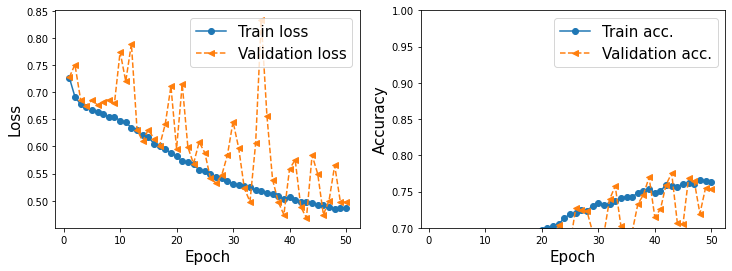

In [ ]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
ax.set_ylim(0.7,1)
plt.show()

In [ ]:
#building model with 1 class
from tensorflow.keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 1

model1 = Sequential()

#1st CNN layer
model1.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.25))

#2nd CNN layer
model1.add(Conv2D(128,(5,5),padding = 'same'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout (0.25))

#3rd CNN layer
model1.add(Conv2D(512,(3,3),padding = 'same'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout (0.25))

#4th CNN layer
model1.add(Conv2D(512,(3,3), padding='same'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model1.add(Dense(256))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.25))


# Fully connected layer 2nd layer
model1.add(Dense(512))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.25))

model1.add(Dense(no_of_classes, activation=None))



opt = Adam(lr = 0.001)
model1.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_8 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 128)      

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# number of epochs to train the NN
tf.random.set_seed(123)
np.random.seed(123)
epochs = 10

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='validation_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history1= model1.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

<ipython-input-56-3e841a876926>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1= model1.fit_generator(generator=train_generator,


Epoch 1/50
225/225 [==============================] - ETA: 0s - loss: 6.0060 - accuracy: 0.5469

225/225 [==============================] - 65s 282ms/step - loss: 6.0060 - accuracy: 0.5469 - val_loss: 6.9248 - val_accuracy: 0.4902
Epoch 2/50
225/225 [==============================] - ETA: 0s - loss: 6.1862 - accuracy: 0.5662

225/225 [==============================] - 64s 285ms/step - loss: 6.1862 - accuracy: 0.5662 - val_loss: 5.6783 - val_accuracy: 0.5641
Epoch 3/50
225/225 [==============================] - ETA: 0s - loss: 5.0742 - accuracy: 0.5321

225/225 [==============================] - 60s 269ms/step - loss: 5.0742 - accuracy: 0.5321 - val_loss: 2.2645 - val_accuracy: 0.5622
Epoch 4/50
225/225 [==============================] - ETA: 0s - loss: 2.3209 - accuracy: 0.5267

225/225 [==============================] - 63s 281ms/step - loss: 2.3209 - accuracy: 0.5267 - val_loss: 1.7246 - val_accuracy: 0.4792
Epoch 5/50
 76/225 [=========>....................] - ETA: 36s - loss: 1.7606 - accuracy: 0.5275

KeyboardInterrupt: ignored

In [ ]:
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# number of epochs to train the NN
tf.random.set_seed(123)
np.random.seed(123)
epochs = 50

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='validation_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  app.launch_new_instance()


Epoch 1/50
900/900 [==============================] - ETA: 0s - loss: 1.9221 - accuracy: 0.2204

900/900 [==============================] - 79s 77ms/step - loss: 1.9221 - accuracy: 0.2204 - val_loss: 1.9940 - val_accuracy: 0.2307
Epoch 2/50
900/900 [==============================] - ETA: 0s - loss: 1.8298 - accuracy: 0.2379

900/900 [==============================] - 72s 80ms/step - loss: 1.8298 - accuracy: 0.2379 - val_loss: 1.9583 - val_accuracy: 0.2031
Epoch 3/50
900/900 [==============================] - ETA: 0s - loss: 1.7996 - accuracy: 0.2506

900/900 [==============================] - 68s 76ms/step - loss: 1.7996 - accuracy: 0.2506 - val_loss: 1.7612 - val_accuracy: 0.2598
Epoch 4/50
900/900 [==============================] - ETA: 0s - loss: 1.7792 - accuracy: 0.2645

900/900 [==============================] - 68s 76ms/step - loss: 1.7792 - accuracy: 0.2645 - val_loss: 2.0262 - val_accuracy: 0.2511
Epoch 5/50
900/900 [==============================] - ETA: 0s - loss: 1.7418 - accuracy: 0.2842

900/900 [==============================] - 67s 75ms/step - loss: 1.7418 - accuracy: 0.2842 - val_loss: 1.7848 - val_accuracy: 0.3024
Epoch 6/50
900/900 [==============================] - ETA: 0s - loss: 1.6961 - accuracy: 0.3140

900/900 [==============================] - 68s 75ms/step - loss: 1.6961 - accuracy: 0.3140 - val_loss: 1.8960 - val_accuracy: 0.2834
Epoch 7/50
900/900 [==============================] - ETA: 0s - loss: 1.6545 - accuracy: 0.3394

900/900 [==============================] - 67s 75ms/step - loss: 1.6545 - accuracy: 0.3394 - val_loss: 1.6800 - val_accuracy: 0.2970
Epoch 8/50
900/900 [==============================] - ETA: 0s - loss: 1.6196 - accuracy: 0.3598

900/900 [==============================] - 68s 75ms/step - loss: 1.6196 - accuracy: 0.3598 - val_loss: 1.5463 - val_accuracy: 0.3997
Epoch 9/50
900/900 [==============================] - ETA: 0s - loss: 1.5811 - accuracy: 0.3809

900/900 [==============================] - 67s 75ms/step - loss: 1.5811 - accuracy: 0.3809 - val_loss: 1.6326 - val_accuracy: 0.3719
Epoch 10/50
900/900 [==============================] - ETA: 0s - loss: 1.5513 - accuracy: 0.3947

900/900 [==============================] - 68s 76ms/step - loss: 1.5513 - accuracy: 0.3947 - val_loss: 1.6735 - val_accuracy: 0.3753
Epoch 11/50
900/900 [==============================] - ETA: 0s - loss: 1.5189 - accuracy: 0.4081

900/900 [==============================] - 67s 75ms/step - loss: 1.5189 - accuracy: 0.4081 - val_loss: 1.5921 - val_accuracy: 0.3584
Epoch 12/50
900/900 [==============================] - ETA: 0s - loss: 1.4971 - accuracy: 0.4199

900/900 [==============================] - 67s 75ms/step - loss: 1.4971 - accuracy: 0.4199 - val_loss: 1.4234 - val_accuracy: 0.4544
Epoch 13/50
900/900 [==============================] - ETA: 0s - loss: 1.4848 - accuracy: 0.4238

900/900 [==============================] - 67s 75ms/step - loss: 1.4848 - accuracy: 0.4238 - val_loss: 1.5271 - val_accuracy: 0.4169
Epoch 14/50
900/900 [==============================] - ETA: 0s - loss: 1.4670 - accuracy: 0.4311

900/900 [==============================] - 68s 75ms/step - loss: 1.4670 - accuracy: 0.4311 - val_loss: 1.4129 - val_accuracy: 0.4564
Epoch 15/50
900/900 [==============================] - ETA: 0s - loss: 1.4467 - accuracy: 0.4401

900/900 [==============================] - 68s 75ms/step - loss: 1.4467 - accuracy: 0.4401 - val_loss: 1.3570 - val_accuracy: 0.4849
Epoch 16/50
900/900 [==============================] - ETA: 0s - loss: 1.4287 - accuracy: 0.4486

900/900 [==============================] - 67s 74ms/step - loss: 1.4287 - accuracy: 0.4486 - val_loss: 1.4671 - val_accuracy: 0.4369
Epoch 17/50
900/900 [==============================] - ETA: 0s - loss: 1.4150 - accuracy: 0.4554

900/900 [==============================] - 67s 75ms/step - loss: 1.4150 - accuracy: 0.4554 - val_loss: 1.4561 - val_accuracy: 0.4401
Epoch 18/50
900/900 [==============================] - ETA: 0s - loss: 1.4098 - accuracy: 0.4566

900/900 [==============================] - 67s 75ms/step - loss: 1.4098 - accuracy: 0.4566 - val_loss: 1.3950 - val_accuracy: 0.4649
Epoch 19/50
900/900 [==============================] - ETA: 0s - loss: 1.3935 - accuracy: 0.4596

900/900 [==============================] - 68s 76ms/step - loss: 1.3935 - accuracy: 0.4596 - val_loss: 1.3100 - val_accuracy: 0.4871
Epoch 20/50
900/900 [==============================] - ETA: 0s - loss: 1.3868 - accuracy: 0.4665

900/900 [==============================] - 68s 75ms/step - loss: 1.3868 - accuracy: 0.4665 - val_loss: 1.3575 - val_accuracy: 0.4805
Epoch 21/50
900/900 [==============================] - ETA: 0s - loss: 1.3743 - accuracy: 0.4694

900/900 [==============================] - 67s 75ms/step - loss: 1.3743 - accuracy: 0.4694 - val_loss: 1.4969 - val_accuracy: 0.4423
Epoch 22/50
900/900 [==============================] - ETA: 0s - loss: 1.3664 - accuracy: 0.4732

900/900 [==============================] - 67s 74ms/step - loss: 1.3664 - accuracy: 0.4732 - val_loss: 1.2380 - val_accuracy: 0.5226
Epoch 23/50
900/900 [==============================] - ETA: 0s - loss: 1.3605 - accuracy: 0.4767

900/900 [==============================] - 67s 75ms/step - loss: 1.3605 - accuracy: 0.4767 - val_loss: 1.3609 - val_accuracy: 0.4759
Epoch 24/50
900/900 [==============================] - ETA: 0s - loss: 1.3470 - accuracy: 0.4796

900/900 [==============================] - 67s 74ms/step - loss: 1.3470 - accuracy: 0.4796 - val_loss: 1.3474 - val_accuracy: 0.4855
Epoch 25/50
900/900 [==============================] - ETA: 0s - loss: 1.3467 - accuracy: 0.4812

900/900 [==============================] - 67s 74ms/step - loss: 1.3467 - accuracy: 0.4812 - val_loss: 1.8068 - val_accuracy: 0.3170
Epoch 26/50
900/900 [==============================] - ETA: 0s - loss: 1.3358 - accuracy: 0.4894

900/900 [==============================] - 69s 76ms/step - loss: 1.3358 - accuracy: 0.4894 - val_loss: 1.2296 - val_accuracy: 0.5310
Epoch 27/50
900/900 [==============================] - ETA: 0s - loss: 1.3276 - accuracy: 0.4905

900/900 [==============================] - 67s 75ms/step - loss: 1.3276 - accuracy: 0.4905 - val_loss: 1.3779 - val_accuracy: 0.4730
Epoch 28/50
900/900 [==============================] - ETA: 0s - loss: 1.3187 - accuracy: 0.4938

900/900 [==============================] - 67s 74ms/step - loss: 1.3187 - accuracy: 0.4938 - val_loss: 1.3545 - val_accuracy: 0.4804
Epoch 29/50
900/900 [==============================] - ETA: 0s - loss: 1.3185 - accuracy: 0.4946

900/900 [==============================] - 68s 75ms/step - loss: 1.3185 - accuracy: 0.4946 - val_loss: 1.2186 - val_accuracy: 0.5376
Epoch 30/50
900/900 [==============================] - ETA: 0s - loss: 1.3111 - accuracy: 0.4965

900/900 [==============================] - 67s 74ms/step - loss: 1.3111 - accuracy: 0.4965 - val_loss: 1.2145 - val_accuracy: 0.5251
Epoch 31/50
900/900 [==============================] - ETA: 0s - loss: 1.3077 - accuracy: 0.4975

900/900 [==============================] - 67s 75ms/step - loss: 1.3077 - accuracy: 0.4975 - val_loss: 1.3019 - val_accuracy: 0.4977
Epoch 32/50
900/900 [==============================] - ETA: 0s - loss: 1.2973 - accuracy: 0.5028

900/900 [==============================] - 67s 74ms/step - loss: 1.2973 - accuracy: 0.5028 - val_loss: 1.2322 - val_accuracy: 0.5320
Epoch 33/50
900/900 [==============================] - ETA: 0s - loss: 1.2955 - accuracy: 0.5054

900/900 [==============================] - 67s 74ms/step - loss: 1.2955 - accuracy: 0.5054 - val_loss: 1.3879 - val_accuracy: 0.4509
Epoch 34/50
900/900 [==============================] - ETA: 0s - loss: 1.2855 - accuracy: 0.5074

900/900 [==============================] - 66s 73ms/step - loss: 1.2855 - accuracy: 0.5074 - val_loss: 1.4302 - val_accuracy: 0.4379
Epoch 35/50
900/900 [==============================] - ETA: 0s - loss: 1.2777 - accuracy: 0.5111

900/900 [==============================] - 67s 75ms/step - loss: 1.2777 - accuracy: 0.5111 - val_loss: 1.2526 - val_accuracy: 0.5247
Epoch 36/50
900/900 [==============================] - ETA: 0s - loss: 1.2808 - accuracy: 0.5099

900/900 [==============================] - 67s 74ms/step - loss: 1.2808 - accuracy: 0.5099 - val_loss: 1.2061 - val_accuracy: 0.5372
Epoch 37/50
900/900 [==============================] - ETA: 0s - loss: 1.2723 - accuracy: 0.5118

900/900 [==============================] - 67s 74ms/step - loss: 1.2723 - accuracy: 0.5118 - val_loss: 1.2137 - val_accuracy: 0.5433
Epoch 38/50
900/900 [==============================] - ETA: 0s - loss: 1.2727 - accuracy: 0.5136

900/900 [==============================] - 68s 75ms/step - loss: 1.2727 - accuracy: 0.5136 - val_loss: 1.2832 - val_accuracy: 0.5094
Epoch 39/50
900/900 [==============================] - ETA: 0s - loss: 1.2692 - accuracy: 0.5130

900/900 [==============================] - 68s 75ms/step - loss: 1.2692 - accuracy: 0.5130 - val_loss: 1.3678 - val_accuracy: 0.4712
Epoch 40/50
900/900 [==============================] - ETA: 0s - loss: 1.2595 - accuracy: 0.5202

900/900 [==============================] - 67s 75ms/step - loss: 1.2595 - accuracy: 0.5202 - val_loss: 1.1529 - val_accuracy: 0.5614
Epoch 41/50
900/900 [==============================] - ETA: 0s - loss: 1.2563 - accuracy: 0.5210

900/900 [==============================] - 67s 74ms/step - loss: 1.2563 - accuracy: 0.5210 - val_loss: 1.3565 - val_accuracy: 0.4848
Epoch 42/50
900/900 [==============================] - ETA: 0s - loss: 1.2566 - accuracy: 0.5197

900/900 [==============================] - 67s 75ms/step - loss: 1.2566 - accuracy: 0.5197 - val_loss: 1.1560 - val_accuracy: 0.5622
Epoch 43/50
900/900 [==============================] - ETA: 0s - loss: 1.2484 - accuracy: 0.5248

900/900 [==============================] - 68s 76ms/step - loss: 1.2484 - accuracy: 0.5248 - val_loss: 1.1938 - val_accuracy: 0.5520
Epoch 44/50
900/900 [==============================] - ETA: 0s - loss: 1.2503 - accuracy: 0.5224

900/900 [==============================] - 67s 74ms/step - loss: 1.2503 - accuracy: 0.5224 - val_loss: 1.4584 - val_accuracy: 0.4354
Epoch 45/50
900/900 [==============================] - ETA: 0s - loss: 1.2456 - accuracy: 0.5230

900/900 [==============================] - 67s 74ms/step - loss: 1.2456 - accuracy: 0.5230 - val_loss: 1.3421 - val_accuracy: 0.4844
Epoch 46/50
900/900 [==============================] - ETA: 0s - loss: 1.2409 - accuracy: 0.5257

900/900 [==============================] - 67s 75ms/step - loss: 1.2409 - accuracy: 0.5257 - val_loss: 1.1880 - val_accuracy: 0.5470
Epoch 47/50
900/900 [==============================] - ETA: 0s - loss: 1.2410 - accuracy: 0.5269

900/900 [==============================] - 74s 82ms/step - loss: 1.2410 - accuracy: 0.5269 - val_loss: 1.2174 - val_accuracy: 0.5349
Epoch 48/50
900/900 [==============================] - ETA: 0s - loss: 1.2424 - accuracy: 0.5229

900/900 [==============================] - 69s 76ms/step - loss: 1.2424 - accuracy: 0.5229 - val_loss: 1.1574 - val_accuracy: 0.5567
Epoch 49/50
900/900 [==============================] - ETA: 0s - loss: 1.2352 - accuracy: 0.5288

900/900 [==============================] - 69s 76ms/step - loss: 1.2352 - accuracy: 0.5288 - val_loss: 1.3847 - val_accuracy: 0.4714
Epoch 50/50
900/900 [==============================] - ETA: 0s - loss: 1.2356 - accuracy: 0.5304

900/900 [==============================] - 71s 78ms/step - loss: 1.2356 - accuracy: 0.5304 - val_loss: 1.4566 - val_accuracy: 0.4310


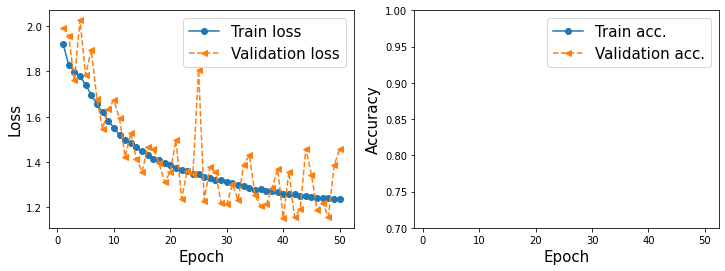

In [ ]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
ax.set_ylim(0.7,1)
plt.show()

In [ ]:
"""
Applying data augmentation to the images as we read 
them from their respectivve directories
"""
img_size=48
train_generator = datagen_train.flow_from_directory(directory = training_emotions,
                                                    target_size = (img_size,img_size),
                                                    color_mode = "grayscale",
                                                    class_mode = "binary",
                                                    batch_size=64,
                                                     shuffle=True
                                                   )
validation_generator = datagen_validation.flow_from_directory( directory = validation_emotions,
                                                              target_size = (img_size,img_size),
                                                              color_mode = "grayscale",
                                                              class_mode = "binary",
                                                              batch_size=64,
                                                              shuffle=False
                                                             )

Found 28821 images belonging to 2 classes.
Found 7066 images belonging to 2 classes.


In [ ]:
model = Sequential()
# create model structure
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='softmax')
])
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                  

In [ ]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

https://github.com/JostineHo/mememoji/blob/master/data_visualization.ipynb

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_7 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)       

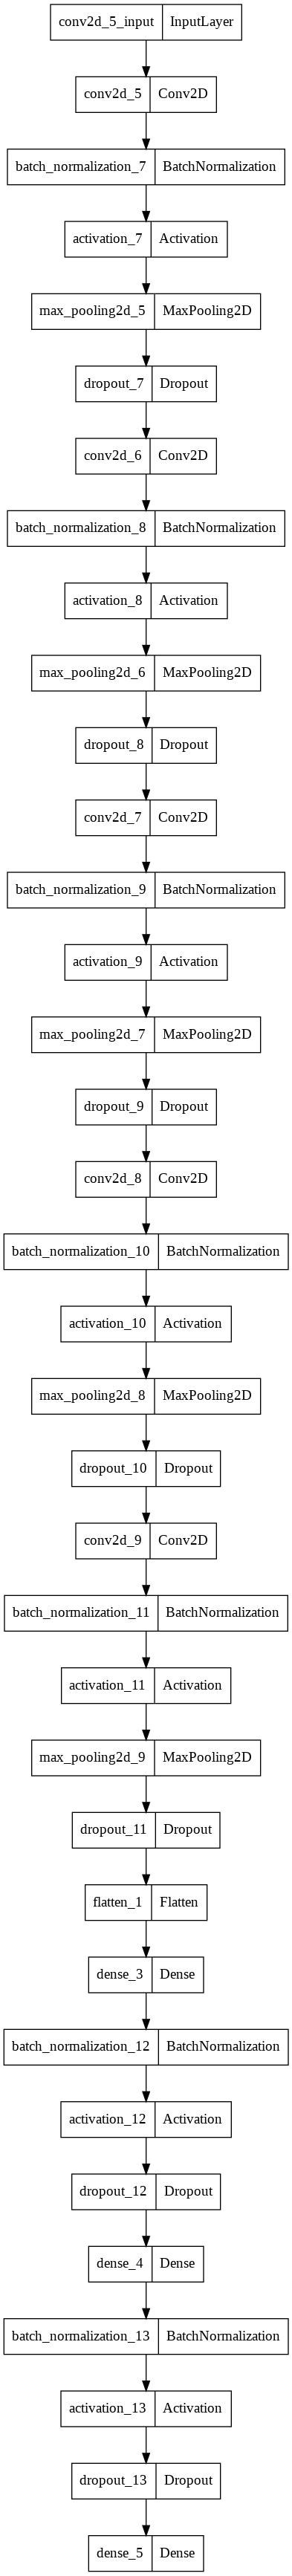

In [ ]:
nb_class = 1
# Initialising the CNN
model = Sequential()

# 1 - Convolution
# activation function determines which nodes should be fired , nodes that are close to one another
# Relu has been found to perform better in most situations to introduce non-linearity in CNN
# we use pooling  to reduce the dimensionality of each features while retaining the most important information
# Batch normalization improves the performance and stability of NNs by providing inputs with zero mean and unit variance.
# bach_size  number of samples in a subset .. when workinh with big traininhg sets , dividing them into different batches and train each one in turn is common 
# Dropoutreduces overfitting and helps prevent the NN from relying on one node in the layer too much


model.add(Conv2D(32,kernel_size=(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(64,kernel_size=(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(128,kernel_size=(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(256,kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 5th Convolution layer

model.add(Conv2D(512,kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_class, activation='sigmoid'))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
tf.keras.utils.plot_model(model)

In [ ]:
# number of epochs to train the NN
tf.random.set_seed(123)
np.random.seed(123)
epochs = 50

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='validation_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  app.launch_new_instance()


450/450 [==============================] - ETA: 0s - loss: 0.7305 - accuracy: 0.5387

450/450 [==============================] - 63s 137ms/step - loss: 0.7305 - accuracy: 0.5387 - val_loss: 0.6860 - val_accuracy: 0.5717
Epoch 2/50
450/450 [==============================] - ETA: 0s - loss: 0.6913 - accuracy: 0.5681

450/450 [==============================] - 62s 138ms/step - loss: 0.6913 - accuracy: 0.5681 - val_loss: 0.6847 - val_accuracy: 0.5553
Epoch 3/50
450/450 [==============================] - ETA: 0s - loss: 0.6789 - accuracy: 0.5819

450/450 [==============================] - 62s 138ms/step - loss: 0.6789 - accuracy: 0.5819 - val_loss: 0.6670 - val_accuracy: 0.6017
Epoch 4/50
450/450 [==============================] - ETA: 0s - loss: 0.6733 - accuracy: 0.5898

450/450 [==============================] - 61s 136ms/step - loss: 0.6733 - accuracy: 0.5898 - val_loss: 0.6642 - val_accuracy: 0.6009
Epoch 5/50
450/450 [==============================] - ETA: 0s - loss: 0.6717 - accuracy: 0.5964

450/450 [==============================] - 61s 136ms/step - loss: 0.6717 - accuracy: 0.5964 - val_loss: 0.6865 - val_accuracy: 0.5578
Epoch 6/50
450/450 [==============================] - ETA: 0s - loss: 0.6685 - accuracy: 0.5995

450/450 [==============================] - 62s 138ms/step - loss: 0.6685 - accuracy: 0.5995 - val_loss: 0.6691 - val_accuracy: 0.5923
Epoch 7/50
450/450 [==============================] - ETA: 0s - loss: 0.6667 - accuracy: 0.5997

450/450 [==============================] - 62s 137ms/step - loss: 0.6667 - accuracy: 0.5997 - val_loss: 0.6609 - val_accuracy: 0.6149
Epoch 8/50
450/450 [==============================] - ETA: 0s - loss: 0.6636 - accuracy: 0.6101

450/450 [==============================] - 61s 137ms/step - loss: 0.6636 - accuracy: 0.6101 - val_loss: 0.6644 - val_accuracy: 0.6021
Epoch 9/50
450/450 [==============================] - ETA: 0s - loss: 0.6623 - accuracy: 0.6065

450/450 [==============================] - 61s 135ms/step - loss: 0.6623 - accuracy: 0.6065 - val_loss: 0.6617 - val_accuracy: 0.6072
Epoch 10/50
450/450 [==============================] - ETA: 0s - loss: 0.6601 - accuracy: 0.6107

450/450 [==============================] - 62s 137ms/step - loss: 0.6601 - accuracy: 0.6107 - val_loss: 0.6626 - val_accuracy: 0.6016
Epoch 11/50
450/450 [==============================] - ETA: 0s - loss: 0.6577 - accuracy: 0.6173

450/450 [==============================] - 60s 134ms/step - loss: 0.6577 - accuracy: 0.6173 - val_loss: 0.6552 - val_accuracy: 0.6111
Epoch 12/50
450/450 [==============================] - ETA: 0s - loss: 0.6537 - accuracy: 0.6210

450/450 [==============================] - 60s 133ms/step - loss: 0.6537 - accuracy: 0.6210 - val_loss: 0.7489 - val_accuracy: 0.5342
Epoch 13/50
450/450 [==============================] - ETA: 0s - loss: 0.6488 - accuracy: 0.6271

450/450 [==============================] - 62s 137ms/step - loss: 0.6488 - accuracy: 0.6271 - val_loss: 0.7068 - val_accuracy: 0.5825
Epoch 14/50
450/450 [==============================] - ETA: 0s - loss: 0.6437 - accuracy: 0.6357

450/450 [==============================] - 62s 137ms/step - loss: 0.6437 - accuracy: 0.6357 - val_loss: 0.7260 - val_accuracy: 0.5386
Epoch 15/50
450/450 [==============================] - ETA: 0s - loss: 0.6349 - accuracy: 0.6434

450/450 [==============================] - 61s 135ms/step - loss: 0.6349 - accuracy: 0.6434 - val_loss: 0.6387 - val_accuracy: 0.6335
Epoch 16/50
450/450 [==============================] - ETA: 0s - loss: 0.6311 - accuracy: 0.6536

450/450 [==============================] - 61s 136ms/step - loss: 0.6311 - accuracy: 0.6536 - val_loss: 0.6304 - val_accuracy: 0.6411
Epoch 17/50
450/450 [==============================] - ETA: 0s - loss: 0.6262 - accuracy: 0.6560

450/450 [==============================] - 61s 136ms/step - loss: 0.6262 - accuracy: 0.6560 - val_loss: 0.6457 - val_accuracy: 0.6504
Epoch 18/50
450/450 [==============================] - ETA: 0s - loss: 0.6210 - accuracy: 0.6590

450/450 [==============================] - 60s 134ms/step - loss: 0.6210 - accuracy: 0.6590 - val_loss: 0.6104 - val_accuracy: 0.6817
Epoch 19/50
450/450 [==============================] - ETA: 0s - loss: 0.6161 - accuracy: 0.6659

450/450 [==============================] - 60s 134ms/step - loss: 0.6161 - accuracy: 0.6659 - val_loss: 0.7228 - val_accuracy: 0.6024
Epoch 20/50
450/450 [==============================] - ETA: 0s - loss: 0.6067 - accuracy: 0.6757

450/450 [==============================] - 61s 136ms/step - loss: 0.6067 - accuracy: 0.6757 - val_loss: 0.6281 - val_accuracy: 0.6521
Epoch 21/50
450/450 [==============================] - ETA: 0s - loss: 0.6022 - accuracy: 0.6782

450/450 [==============================] - 61s 135ms/step - loss: 0.6022 - accuracy: 0.6782 - val_loss: 0.6492 - val_accuracy: 0.6354
Epoch 22/50
450/450 [==============================] - ETA: 0s - loss: 0.5973 - accuracy: 0.6822

450/450 [==============================] - 62s 137ms/step - loss: 0.5973 - accuracy: 0.6822 - val_loss: 0.5803 - val_accuracy: 0.6969
Epoch 23/50
450/450 [==============================] - ETA: 0s - loss: 0.5962 - accuracy: 0.6837

450/450 [==============================] - 61s 135ms/step - loss: 0.5962 - accuracy: 0.6837 - val_loss: 0.5623 - val_accuracy: 0.7186
Epoch 24/50
450/450 [==============================] - ETA: 0s - loss: 0.5902 - accuracy: 0.6858

450/450 [==============================] - 61s 137ms/step - loss: 0.5902 - accuracy: 0.6858 - val_loss: 0.6211 - val_accuracy: 0.6592
Epoch 25/50
450/450 [==============================] - ETA: 0s - loss: 0.5848 - accuracy: 0.6938

450/450 [==============================] - 60s 134ms/step - loss: 0.5848 - accuracy: 0.6938 - val_loss: 0.5592 - val_accuracy: 0.7162
Epoch 26/50
450/450 [==============================] - ETA: 0s - loss: 0.5815 - accuracy: 0.6974

450/450 [==============================] - 60s 132ms/step - loss: 0.5815 - accuracy: 0.6974 - val_loss: 0.5458 - val_accuracy: 0.7178
Epoch 27/50
450/450 [==============================] - ETA: 0s - loss: 0.5751 - accuracy: 0.7004

450/450 [==============================] - 61s 136ms/step - loss: 0.5751 - accuracy: 0.7004 - val_loss: 0.5466 - val_accuracy: 0.7205
Epoch 28/50
450/450 [==============================] - ETA: 0s - loss: 0.5690 - accuracy: 0.7073

450/450 [==============================] - 60s 133ms/step - loss: 0.5690 - accuracy: 0.7073 - val_loss: 0.5466 - val_accuracy: 0.7229
Epoch 29/50
450/450 [==============================] - ETA: 0s - loss: 0.5696 - accuracy: 0.7075

450/450 [==============================] - 59s 132ms/step - loss: 0.5696 - accuracy: 0.7075 - val_loss: 0.5748 - val_accuracy: 0.7018
Epoch 30/50
450/450 [==============================] - ETA: 0s - loss: 0.5676 - accuracy: 0.7061

450/450 [==============================] - 60s 133ms/step - loss: 0.5676 - accuracy: 0.7061 - val_loss: 0.5677 - val_accuracy: 0.7040
Epoch 31/50
450/450 [==============================] - ETA: 0s - loss: 0.5592 - accuracy: 0.7161

450/450 [==============================] - 60s 133ms/step - loss: 0.5592 - accuracy: 0.7161 - val_loss: 0.5732 - val_accuracy: 0.6885
Epoch 32/50
450/450 [==============================] - ETA: 0s - loss: 0.5607 - accuracy: 0.7133

450/450 [==============================] - 59s 132ms/step - loss: 0.5607 - accuracy: 0.7133 - val_loss: 0.5417 - val_accuracy: 0.7251
Epoch 33/50
450/450 [==============================] - ETA: 0s - loss: 0.5559 - accuracy: 0.7163

450/450 [==============================] - 61s 135ms/step - loss: 0.5559 - accuracy: 0.7163 - val_loss: 0.6546 - val_accuracy: 0.6604
Epoch 34/50
450/450 [==============================] - ETA: 0s - loss: 0.5492 - accuracy: 0.7198

450/450 [==============================] - 60s 133ms/step - loss: 0.5492 - accuracy: 0.7198 - val_loss: 0.5520 - val_accuracy: 0.7220
Epoch 35/50
450/450 [==============================] - ETA: 0s - loss: 0.5513 - accuracy: 0.7180

450/450 [==============================] - 60s 132ms/step - loss: 0.5513 - accuracy: 0.7180 - val_loss: 0.5726 - val_accuracy: 0.7057
Epoch 36/50
450/450 [==============================] - ETA: 0s - loss: 0.5463 - accuracy: 0.7262

450/450 [==============================] - 61s 135ms/step - loss: 0.5463 - accuracy: 0.7262 - val_loss: 0.6106 - val_accuracy: 0.6722
Epoch 37/50
450/450 [==============================] - ETA: 0s - loss: 0.5431 - accuracy: 0.7265

450/450 [==============================] - 61s 137ms/step - loss: 0.5431 - accuracy: 0.7265 - val_loss: 0.5012 - val_accuracy: 0.7555
Epoch 38/50
450/450 [==============================] - ETA: 0s - loss: 0.5421 - accuracy: 0.7244

450/450 [==============================] - 61s 135ms/step - loss: 0.5421 - accuracy: 0.7244 - val_loss: 0.5707 - val_accuracy: 0.7095
Epoch 39/50
450/450 [==============================] - ETA: 0s - loss: 0.5399 - accuracy: 0.7283

450/450 [==============================] - 60s 134ms/step - loss: 0.5399 - accuracy: 0.7283 - val_loss: 0.5441 - val_accuracy: 0.7270
Epoch 40/50
450/450 [==============================] - ETA: 0s - loss: 0.5356 - accuracy: 0.7319

450/450 [==============================] - 61s 136ms/step - loss: 0.5356 - accuracy: 0.7319 - val_loss: 0.5333 - val_accuracy: 0.7411
Epoch 41/50
450/450 [==============================] - ETA: 0s - loss: 0.5345 - accuracy: 0.7299

450/450 [==============================] - 61s 135ms/step - loss: 0.5345 - accuracy: 0.7299 - val_loss: 0.4968 - val_accuracy: 0.7598
Epoch 42/50
450/450 [==============================] - ETA: 0s - loss: 0.5360 - accuracy: 0.7348

450/450 [==============================] - 61s 135ms/step - loss: 0.5360 - accuracy: 0.7348 - val_loss: 0.5682 - val_accuracy: 0.7031
Epoch 43/50
450/450 [==============================] - ETA: 0s - loss: 0.5298 - accuracy: 0.7368

450/450 [==============================] - 61s 136ms/step - loss: 0.5298 - accuracy: 0.7368 - val_loss: 0.5586 - val_accuracy: 0.7098
Epoch 44/50
450/450 [==============================] - ETA: 0s - loss: 0.5321 - accuracy: 0.7319

450/450 [==============================] - 61s 135ms/step - loss: 0.5321 - accuracy: 0.7319 - val_loss: 0.6270 - val_accuracy: 0.6499
Epoch 45/50
450/450 [==============================] - ETA: 0s - loss: 0.5244 - accuracy: 0.7388

450/450 [==============================] - 59s 132ms/step - loss: 0.5244 - accuracy: 0.7388 - val_loss: 0.5378 - val_accuracy: 0.7214
Epoch 46/50
450/450 [==============================] - ETA: 0s - loss: 0.5252 - accuracy: 0.7361

450/450 [==============================] - 60s 133ms/step - loss: 0.5252 - accuracy: 0.7361 - val_loss: 0.4842 - val_accuracy: 0.7631
Epoch 47/50
450/450 [==============================] - ETA: 0s - loss: 0.5231 - accuracy: 0.7395

450/450 [==============================] - 61s 135ms/step - loss: 0.5231 - accuracy: 0.7395 - val_loss: 0.4953 - val_accuracy: 0.7541
Epoch 48/50
450/450 [==============================] - ETA: 0s - loss: 0.5237 - accuracy: 0.7392

450/450 [==============================] - 60s 134ms/step - loss: 0.5237 - accuracy: 0.7392 - val_loss: 0.4849 - val_accuracy: 0.7614
Epoch 49/50
450/450 [==============================] - ETA: 0s - loss: 0.5195 - accuracy: 0.7433

450/450 [==============================] - 60s 133ms/step - loss: 0.5195 - accuracy: 0.7433 - val_loss: 0.5267 - val_accuracy: 0.7375
Epoch 50/50
450/450 [==============================] - ETA: 0s - loss: 0.5215 - accuracy: 0.7392

450/450 [==============================] - 60s 134ms/step - loss: 0.5215 - accuracy: 0.7392 - val_loss: 0.6251 - val_accuracy: 0.6743


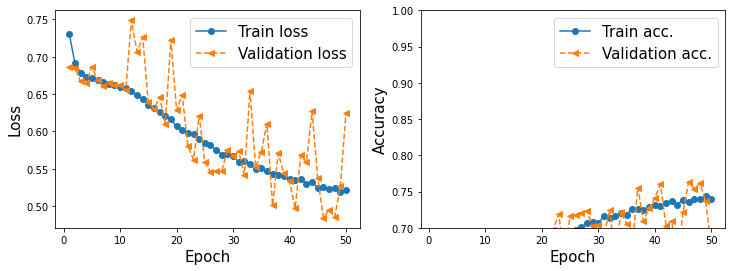

In [ ]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
ax.set_ylim(0.7,1)
plt.show()

# Convolutional Neural Network (CNN)

It is widely used for image analysis/ image classification.

4 convolution layers  which will extract relevant features from the images.

2 fully connected layers will focus on using these features to classify our images well.

In [ ]:
classes = 6
# Initialising the CNN
model = Sequential()

# 1 - Convolution
# activation function determines which nodes should be fired , nodes that are close to one another
# Relu has been found to perform better in most situations to introduce non-linearity in CNN
# we use pooling  to reduce the dimensionality of each features while retaining the most important information
# Batch normalization improves the performance and stability of NNs by providing inputs with zero mean and unit variance.
# bach_size  number of samples in a subset .. when workinh with big traininhg sets , dividing them into different batches and train each one in turn is common 
# Dropoutreduces overfitting and helps prevent the NN from relying on one node in the layer too much


model.add(Conv2D(32,kernel_size=(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(64,kernel_size=(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(128,kernel_size=(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(256,kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 5th Convolution layer

model.add(Conv2D(512,kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(classes, activation='softmax'))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

https://towardsdatascience.com/from-raw-images-to-real-time-predictions-with-deep-learning-ddbbda1be0e4

In [ ]:
# number of epochs to train the NN
epochs = 50

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='validation_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
900/900 [==============================] - ETA: 0s - loss: 1.8741 - accuracy: 0.2169

900/900 [==============================] - 588s 648ms/step - loss: 1.8741 - accuracy: 0.2169 - val_loss: 1.7882 - val_accuracy: 0.2420
Epoch 2/50
900/900 [==============================] - ETA: 0s - loss: 1.7891 - accuracy: 0.2331

900/900 [==============================] - 568s 631ms/step - loss: 1.7891 - accuracy: 0.2331 - val_loss: 1.8079 - val_accuracy: 0.2582
Epoch 3/50
900/900 [==============================] - ETA: 0s - loss: 1.7649 - accuracy: 0.2467

900/900 [==============================] - 570s 633ms/step - loss: 1.7649 - accuracy: 0.2467 - val_loss: 1.7624 - val_accuracy: 0.2580
Epoch 4/50
900/900 [==============================] - ETA: 0s - loss: 1.7557 - accuracy: 0.2464

900/900 [==============================] - 582s 647ms/step - loss: 1.7557 - accuracy: 0.2464 - val_loss: 1.9369 - val_accuracy: 0.2599
Epoch 5/50
900/900 [==============================] - ETA: 0s - loss: 1.7408 - accuracy: 0.2515

900/900 [==============================] - 586s 651ms/step - loss: 1.7408 - accuracy: 0.2515 - val_loss: 1.8116 - val_accuracy: 0.2420
Epoch 6/50
900/900 [==============================] - ETA: 0s - loss: 1.7286 - accuracy: 0.2613

900/900 [==============================] - 588s 654ms/step - loss: 1.7286 - accuracy: 0.2613 - val_loss: 1.9997 - val_accuracy: 0.2239
Epoch 7/50
900/900 [==============================] - ETA: 0s - loss: 1.7144 - accuracy: 0.2686

900/900 [==============================] - 591s 657ms/step - loss: 1.7144 - accuracy: 0.2686 - val_loss: 1.7776 - val_accuracy: 0.2688
Epoch 8/50
900/900 [==============================] - ETA: 0s - loss: 1.6973 - accuracy: 0.2811

900/900 [==============================] - 587s 652ms/step - loss: 1.6973 - accuracy: 0.2811 - val_loss: 2.1619 - val_accuracy: 0.2136
Epoch 9/50
900/900 [==============================] - ETA: 0s - loss: 1.6658 - accuracy: 0.3073

900/900 [==============================] - 585s 650ms/step - loss: 1.6658 - accuracy: 0.3073 - val_loss: 1.7090 - val_accuracy: 0.3197
Epoch 10/50
900/900 [==============================] - ETA: 0s - loss: 1.6273 - accuracy: 0.3298

900/900 [==============================] - 580s 645ms/step - loss: 1.6273 - accuracy: 0.3298 - val_loss: 1.6135 - val_accuracy: 0.3523
Epoch 11/50
900/900 [==============================] - ETA: 0s - loss: 1.5838 - accuracy: 0.3540

900/900 [==============================] - 576s 640ms/step - loss: 1.5838 - accuracy: 0.3540 - val_loss: 1.6663 - val_accuracy: 0.3104
Epoch 12/50
900/900 [==============================] - ETA: 0s - loss: 1.5585 - accuracy: 0.3699

900/900 [==============================] - 574s 638ms/step - loss: 1.5585 - accuracy: 0.3699 - val_loss: 1.6232 - val_accuracy: 0.3206
Epoch 13/50
900/900 [==============================] - ETA: 0s - loss: 1.5336 - accuracy: 0.3795

900/900 [==============================] - 578s 642ms/step - loss: 1.5336 - accuracy: 0.3795 - val_loss: 1.5990 - val_accuracy: 0.3554
Epoch 14/50
900/900 [==============================] - ETA: 0s - loss: 1.5105 - accuracy: 0.3906

900/900 [==============================] - 578s 642ms/step - loss: 1.5105 - accuracy: 0.3906 - val_loss: 1.4222 - val_accuracy: 0.4415
Epoch 15/50
900/900 [==============================] - ETA: 0s - loss: 1.4959 - accuracy: 0.4008

900/900 [==============================] - 583s 648ms/step - loss: 1.4959 - accuracy: 0.4008 - val_loss: 1.4459 - val_accuracy: 0.4251
Epoch 16/50
900/900 [==============================] - ETA: 0s - loss: 1.4876 - accuracy: 0.4031

900/900 [==============================] - 588s 653ms/step - loss: 1.4876 - accuracy: 0.4031 - val_loss: 1.4001 - val_accuracy: 0.4473
Epoch 17/50
900/900 [==============================] - ETA: 0s - loss: 1.4726 - accuracy: 0.4098

900/900 [==============================] - 583s 648ms/step - loss: 1.4726 - accuracy: 0.4098 - val_loss: 1.6278 - val_accuracy: 0.3236
Epoch 18/50
900/900 [==============================] - ETA: 0s - loss: 1.4578 - accuracy: 0.4165

900/900 [==============================] - 587s 652ms/step - loss: 1.4578 - accuracy: 0.4165 - val_loss: 1.3695 - val_accuracy: 0.4544
Epoch 19/50
900/900 [==============================] - ETA: 0s - loss: 1.4427 - accuracy: 0.4262

900/900 [==============================] - 582s 647ms/step - loss: 1.4427 - accuracy: 0.4262 - val_loss: 1.3560 - val_accuracy: 0.4632
Epoch 20/50
900/900 [==============================] - ETA: 0s - loss: 1.4368 - accuracy: 0.4273

900/900 [==============================] - 581s 646ms/step - loss: 1.4368 - accuracy: 0.4273 - val_loss: 1.5415 - val_accuracy: 0.3911
Epoch 21/50
900/900 [==============================] - ETA: 0s - loss: 1.4233 - accuracy: 0.4306

900/900 [==============================] - 583s 647ms/step - loss: 1.4233 - accuracy: 0.4306 - val_loss: 1.3061 - val_accuracy: 0.4841
Epoch 22/50
900/900 [==============================] - ETA: 0s - loss: 1.4158 - accuracy: 0.4377

900/900 [==============================] - 582s 647ms/step - loss: 1.4158 - accuracy: 0.4377 - val_loss: 1.5169 - val_accuracy: 0.4068
Epoch 23/50
900/900 [==============================] - ETA: 0s - loss: 1.4059 - accuracy: 0.4388

900/900 [==============================] - 580s 644ms/step - loss: 1.4059 - accuracy: 0.4388 - val_loss: 1.2789 - val_accuracy: 0.4969
Epoch 24/50
900/900 [==============================] - ETA: 0s - loss: 1.3985 - accuracy: 0.4464

900/900 [==============================] - 582s 647ms/step - loss: 1.3985 - accuracy: 0.4464 - val_loss: 1.5140 - val_accuracy: 0.3949
Epoch 25/50
900/900 [==============================] - ETA: 0s - loss: 1.3932 - accuracy: 0.4480

900/900 [==============================] - 583s 648ms/step - loss: 1.3932 - accuracy: 0.4480 - val_loss: 1.3390 - val_accuracy: 0.4707
Epoch 26/50
900/900 [==============================] - ETA: 0s - loss: 1.3820 - accuracy: 0.4537

900/900 [==============================] - 578s 642ms/step - loss: 1.3820 - accuracy: 0.4537 - val_loss: 1.3769 - val_accuracy: 0.4616
Epoch 27/50
900/900 [==============================] - ETA: 0s - loss: 1.3730 - accuracy: 0.4573

900/900 [==============================] - 591s 656ms/step - loss: 1.3730 - accuracy: 0.4573 - val_loss: 1.3989 - val_accuracy: 0.4489
Epoch 28/50
900/900 [==============================] - ETA: 0s - loss: 1.3624 - accuracy: 0.4586

900/900 [==============================] - 593s 658ms/step - loss: 1.3624 - accuracy: 0.4586 - val_loss: 1.3406 - val_accuracy: 0.4705
Epoch 29/50
900/900 [==============================] - ETA: 0s - loss: 1.3576 - accuracy: 0.4641

900/900 [==============================] - 586s 651ms/step - loss: 1.3576 - accuracy: 0.4641 - val_loss: 1.2420 - val_accuracy: 0.5101
Epoch 30/50
900/900 [==============================] - ETA: 0s - loss: 1.3537 - accuracy: 0.4667

900/900 [==============================] - 582s 647ms/step - loss: 1.3537 - accuracy: 0.4667 - val_loss: 1.3980 - val_accuracy: 0.4435
Epoch 31/50
900/900 [==============================] - ETA: 0s - loss: 1.3549 - accuracy: 0.4643

900/900 [==============================] - 583s 648ms/step - loss: 1.3549 - accuracy: 0.4643 - val_loss: 1.3486 - val_accuracy: 0.4700
Epoch 32/50
900/900 [==============================] - ETA: 0s - loss: 1.3439 - accuracy: 0.4704

900/900 [==============================] - 583s 648ms/step - loss: 1.3439 - accuracy: 0.4704 - val_loss: 1.3099 - val_accuracy: 0.4881
Epoch 33/50
900/900 [==============================] - ETA: 0s - loss: 1.3371 - accuracy: 0.4717

900/900 [==============================] - 586s 651ms/step - loss: 1.3371 - accuracy: 0.4717 - val_loss: 1.3553 - val_accuracy: 0.4679
Epoch 34/50
900/900 [==============================] - ETA: 0s - loss: 1.3367 - accuracy: 0.4733

900/900 [==============================] - 589s 655ms/step - loss: 1.3367 - accuracy: 0.4733 - val_loss: 1.2848 - val_accuracy: 0.4956
Epoch 35/50
900/900 [==============================] - ETA: 0s - loss: 1.3328 - accuracy: 0.4786

900/900 [==============================] - 593s 659ms/step - loss: 1.3328 - accuracy: 0.4786 - val_loss: 1.2300 - val_accuracy: 0.5146
Epoch 36/50
900/900 [==============================] - ETA: 0s - loss: 1.3318 - accuracy: 0.4793

900/900 [==============================] - 588s 654ms/step - loss: 1.3318 - accuracy: 0.4793 - val_loss: 1.3640 - val_accuracy: 0.4619
Epoch 37/50
900/900 [==============================] - ETA: 0s - loss: 1.3264 - accuracy: 0.4796

900/900 [==============================] - 579s 643ms/step - loss: 1.3264 - accuracy: 0.4796 - val_loss: 1.4008 - val_accuracy: 0.4449
Epoch 38/50
900/900 [==============================] - ETA: 0s - loss: 1.3199 - accuracy: 0.4826

900/900 [==============================] - 581s 646ms/step - loss: 1.3199 - accuracy: 0.4826 - val_loss: 1.2060 - val_accuracy: 0.5304
Epoch 39/50
900/900 [==============================] - ETA: 0s - loss: 1.3201 - accuracy: 0.4809

900/900 [==============================] - 583s 647ms/step - loss: 1.3201 - accuracy: 0.4809 - val_loss: 1.1862 - val_accuracy: 0.5365
Epoch 40/50
900/900 [==============================] - ETA: 0s - loss: 1.3124 - accuracy: 0.4822

900/900 [==============================] - 587s 652ms/step - loss: 1.3124 - accuracy: 0.4822 - val_loss: 1.2795 - val_accuracy: 0.5017
Epoch 41/50
900/900 [==============================] - ETA: 0s - loss: 1.3172 - accuracy: 0.4816

900/900 [==============================] - 587s 652ms/step - loss: 1.3172 - accuracy: 0.4816 - val_loss: 1.2051 - val_accuracy: 0.5312
Epoch 42/50
900/900 [==============================] - ETA: 0s - loss: 1.3149 - accuracy: 0.4842

900/900 [==============================] - 592s 658ms/step - loss: 1.3149 - accuracy: 0.4842 - val_loss: 1.2257 - val_accuracy: 0.5214
Epoch 43/50
900/900 [==============================] - ETA: 0s - loss: 1.3079 - accuracy: 0.4878

900/900 [==============================] - 582s 647ms/step - loss: 1.3079 - accuracy: 0.4878 - val_loss: 1.5494 - val_accuracy: 0.3696
Epoch 44/50
900/900 [==============================] - ETA: 0s - loss: 1.2988 - accuracy: 0.4939

900/900 [==============================] - 579s 644ms/step - loss: 1.2988 - accuracy: 0.4939 - val_loss: 1.4072 - val_accuracy: 0.4422
Epoch 45/50
900/900 [==============================] - ETA: 0s - loss: 1.2998 - accuracy: 0.4902

900/900 [==============================] - 577s 641ms/step - loss: 1.2998 - accuracy: 0.4902 - val_loss: 1.3441 - val_accuracy: 0.4713
Epoch 46/50
900/900 [==============================] - ETA: 0s - loss: 1.2978 - accuracy: 0.4896

900/900 [==============================] - 576s 640ms/step - loss: 1.2978 - accuracy: 0.4896 - val_loss: 1.3682 - val_accuracy: 0.4482
Epoch 47/50
900/900 [==============================] - ETA: 0s - loss: 1.2925 - accuracy: 0.4905

900/900 [==============================] - 574s 638ms/step - loss: 1.2925 - accuracy: 0.4905 - val_loss: 1.1873 - val_accuracy: 0.5362
Epoch 48/50
900/900 [==============================] - ETA: 0s - loss: 1.2863 - accuracy: 0.4962

900/900 [==============================] - 573s 637ms/step - loss: 1.2863 - accuracy: 0.4962 - val_loss: 1.1926 - val_accuracy: 0.5348
Epoch 49/50
900/900 [==============================] - ETA: 0s - loss: 1.2895 - accuracy: 0.4949

900/900 [==============================] - 573s 636ms/step - loss: 1.2895 - accuracy: 0.4949 - val_loss: 1.1703 - val_accuracy: 0.5419
Epoch 50/50
900/900 [==============================] - ETA: 0s - loss: 1.2881 - accuracy: 0.4951

900/900 [==============================] - 572s 635ms/step - loss: 1.2881 - accuracy: 0.4951 - val_loss: 1.2608 - val_accuracy: 0.5044


In [ ]:
# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)
datagen_test = ImageDataGenerator(rescale=1./255)

train_generator = datagen_train.flow_from_directory(train_dir,
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

test_generator = datagen_test.flow_from_directory(val_dir,
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

In [ ]:
"""
Applying data augmentation to the images as we read 
them from their respectivve directories
"""
train_generator = datagen_train.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = datagen_validation.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )